In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# dataset can be found here: https://www.kaggle.com/henrysue/online-shoppers-intention
data = pd.read_csv("online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

C:\Users\Shobhandeb\AppData\Local\Temp\ipykernel_6540\2196202523.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)


<Axes: >

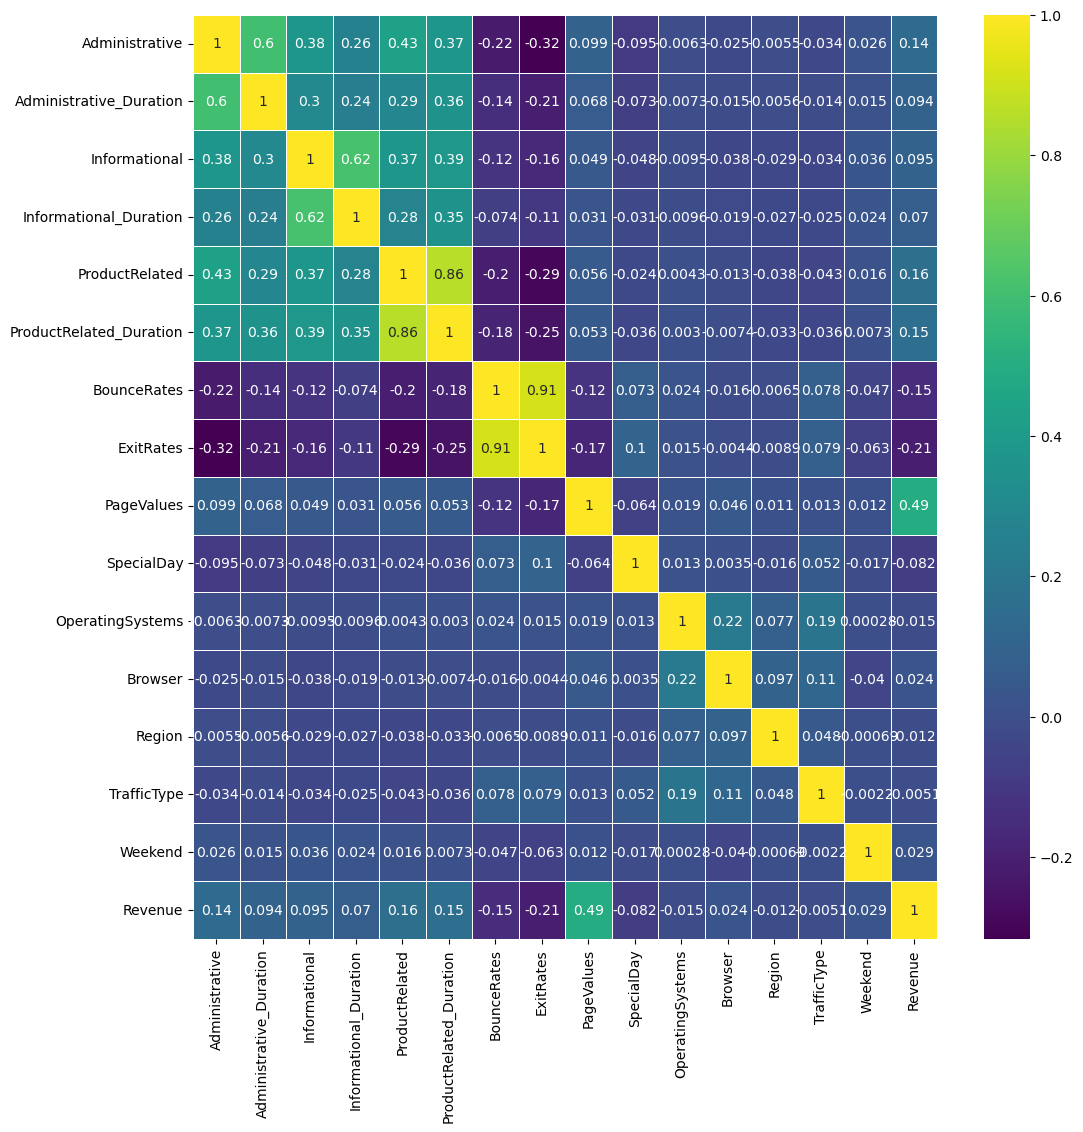

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [6]:
#Deleting unnecessary columns

data_extracted = data.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis = 1)

In [7]:
data_extracted['ProductRelated'].value_counts() # a categorical type but the data is too spread (ranges from 1 too 399)

1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

In [8]:
data_extracted['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [9]:
visitor = pd.get_dummies(data_extracted['VisitorType'])

X = pd.concat([data_extracted, visitor], axis=1)
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0,1
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0,1
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0,1
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0,1
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0,1


In [10]:
# Now we have build some features and extracted some feature data, whats left is to remove redundant features
X.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [11]:
y = X['Revenue']
X_new = X.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)

In [12]:
X_new

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,0,0,1
1,0.0,0.0,2,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,0,0,1
2,0.0,0.0,1,0.200000,0.200000,0.000000,0.0,4,1,9,3,False,0,0,1
3,0.0,0.0,2,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,0,0,1
4,0.0,0.0,10,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,145.0,0.0,53,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,0,0,1
12326,0.0,0.0,5,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,0,0,1
12327,0.0,0.0,6,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,0,0,1
12328,75.0,0.0,15,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,0,0,1


In [13]:
X_new.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [14]:
X.columns

Index(['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'New_Visitor', 'Other', 'Returning_Visitor'],
      dtype='object')

In [15]:
X_new['Weekend'] = np.asarray(X_new['Weekend']).astype(np.float32)

y = np.asarray(y).astype(np.float32)

In [16]:
X_new.shape


(12330, 15)

In [17]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
revenue_model = RandomForestClassifier()
revenue_model.fit(X_new, y)

RandomForestClassifier()

In [19]:
y_is_weekend = data['Weekend']
X_new1 = X.drop(['Revenue', 'Month', 'VisitorType','Weekend'], axis = 1)

In [20]:
# Create and train the Random Forest Classifier model for predicting whether it occurs on the weekend
weekend_model = RandomForestClassifier()
weekend_model.fit(X_new1, y_is_weekend)

RandomForestClassifier()

In [21]:
y_informational_duration = data['Informational_Duration']  # Target variable: Informational_Duration
X_new2 =  X.drop(['Revenue', 'Month', 'VisitorType','Weekend','Informational_Duration'], axis = 1)

In [22]:
# Create and train the Random Forest Regressor model for predicting informational duration
info_duration_model = RandomForestRegressor()
info_duration_model.fit(X_new2, y_informational_duration)

RandomForestRegressor()

In [23]:
# Make predictions
revenue_prediction = revenue_model.predict(X_new)
weekend_prediction = weekend_model.predict(X_new1)
info_duration_prediction = info_duration_model.predict(X_new2)

In [24]:
# Evaluate the models (optional)
revenue_accuracy = accuracy_score(y, revenue_prediction)
weekend_accuracy = accuracy_score(y_is_weekend, weekend_prediction)

In [25]:
# Print the evaluation scores (optional)
print("Revenue Accuracy:", revenue_accuracy)
print("Weekend Accuracy:", weekend_accuracy)

Revenue Accuracy: 0.9998377939983779
Weekend Accuracy: 0.9912408759124087


In [26]:
from sklearn.metrics import mean_squared_error
info_duration_mse = mean_squared_error(y_informational_duration, info_duration_prediction)

In [27]:
print("Informational Duration Mean Squared Error:", info_duration_mse)

Informational Duration Mean Squared Error: 2658.5915964956357
